Sarah's exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

import prepare
import model

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB

In [2]:
# acquire dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# prepare data using script
df = prepare.prep_data(df).drop(columns=['age_range'])

In [4]:
# split the dataset into train_validate and test
train_validate, test = train_test_split(df, test_size=.2, random_state=777)

In [5]:
# the second split of train and validate
train, validate = train_test_split(train_validate, test_size=.25, random_state=777)

In [6]:
# checking the shape of each dataset
train.shape, validate.shape, test.shape

((3065, 11), (1022, 11), (1022, 11))

What are the top indicators for stroke?

In [7]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
448,Male,65.0,0,0,Yes,Private,Urban,145.15,28.9,Unknown,0
4128,Female,78.0,0,0,Yes,Self-employed,Rural,208.99,31.4,formerly smoked,0
4699,Male,47.0,0,0,Yes,Private,Rural,110.14,30.5,smokes,0
5035,Male,56.0,0,0,Yes,Self-employed,Rural,125.87,24.6,never smoked,0
3007,Female,73.0,0,0,No,Self-employed,Rural,69.35,30.2,never smoked,0


In [10]:
pd.crosstab(train['stroke'], train['ever_married'])

ever_married,No,Yes
stroke,,
0,1037,1877
1,14,137


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

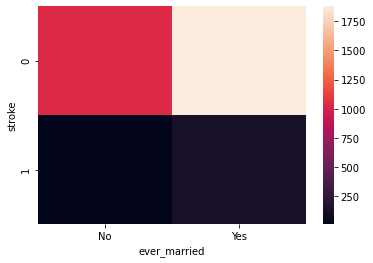

In [11]:
sns.heatmap(pd.crosstab(train['stroke'], train['ever_married']))

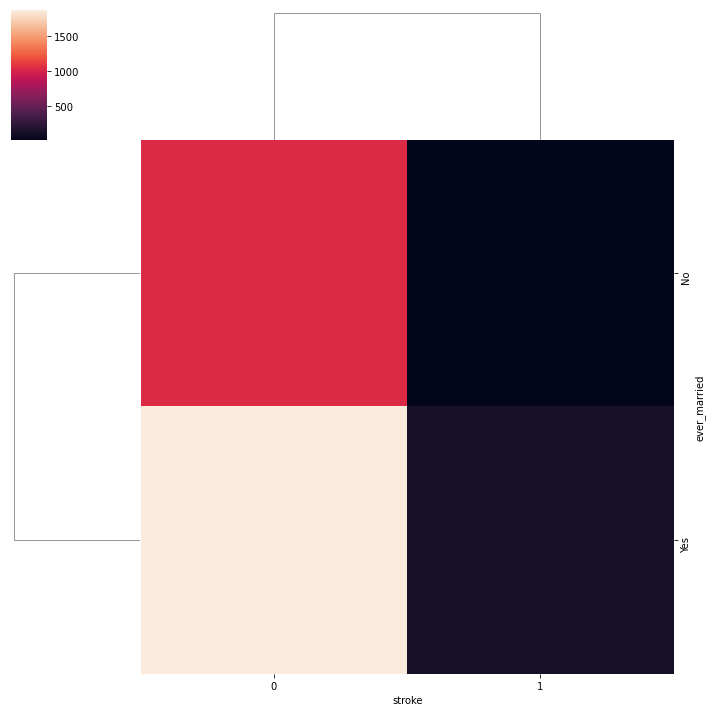

In [12]:
# here is a cluster map
sns.clustermap(pd.crosstab(train['ever_married'], train['stroke']))
plt.show()

In [13]:
train.corr()["stroke"]

age                  0.237957
avg_glucose_level    0.169730
bmi                  0.049939
stroke               1.000000
Name: stroke, dtype: float64

In [ ]:
- age is most correlated with stroke followed by glucose and then bmi

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


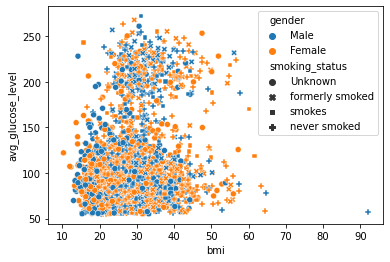

In [16]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["bmi"], train["avg_glucose_level"], hue=train["gender"], style=train['smoking_status'])
plt.show()